<a href="https://www.kaggle.com/code/chulsey/waterquality-eda?scriptVersionId=190796871" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-quality-data/waterquality.csv


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:

#Import data and examine
df_waterquality = pd.read_csv("../input/water-quality-data/waterquality.csv")
df_waterquality.shape



(2371, 8)

In [4]:
df_waterquality.head(10)

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000
5,1989-07-20,NaN,1.6,9.0,0.3,0.9,30.0,32.500000
6,1989-07-27,NaN,6.2,9.0,0.3,0.8,27.0,27.000000
7,1989-08-03,NaN,5.8,9.5,0.2,0.7,25.0,28.000000
8,1989-08-10,NaN,3.2,9.0,0.2,0.3,21.5,22.500000
9,1989-08-17,NaN,7.3,9.0,0.2,0.8,28.0,29.000000


In [5]:
df_waterquality.tail(10)

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
2361,2019-10-23,0.5,6.2,7.0,0.5,0.9,19.0,17.222222
2362,2019-10-23,0.0,NaN,6.5,0.9,1.0,20.0,17.222222
2363,2019-10-23,0.0,4.6,6.5,0.2,0.2,20.0,17.222222
2364,2019-10-28,0.1,NaN,6.5,0.7,1.0,13.0,9.444444
2365,2019-11-05,0.0,NaN,6.5,9.0,12.0,27.0,21.111111
2366,NaN,0.0,NaN,7.0,0.3,0.5,14.0,11.111111
2367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-17.777778
2368,NaN,0.0,3.9,6.5,0.3,1.8,22.0,21.111111
2369,NaN,1.0,NaN,7.0,0.6,1.0,17.0,21.111111
2370,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-17.777778


How may NaN values in each column?

In [6]:
df_waterquality.isna().sum()

Date                        5
Salinity (ppt)            130
DissolvedOxygen (mg/L)    851
pH                         95
SecchiDepth (m)            73
WaterDepth (m)             71
WaterTemp (C)             121
AirTemp (C)                 0
dtype: int64

Drop 5 rows with NaN dates (2 of those rows have almost not information).

In [7]:
df_waterquality = df_waterquality.dropna(subset=['Date'])

In [8]:
#Get date range

#Convert date column to datetime format
df_waterquality['Date'] = pd.to_datetime(df_waterquality['Date'])
min_date = df_waterquality['Date'].min()
max_date = df_waterquality['Date'].max()

print("Start date:", min_date)
print("End date:", max_date)

Start date: 1989-05-11 00:00:00
End date: 2019-11-05 00:00:00


Data is recorded from May 11th, 1989 to November, 11th, 2019. A span of roughly 30 years. 

Index df by Date

In [9]:
df_waterquality['Date'] = pd.to_datetime(df_waterquality['Date'], errors='coerce')
df_waterquality = df_waterquality.set_index('Date')
df_waterquality

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
Date,,,,,,,
1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000
...,...,...,...,...,...,...,...
2019-10-23,0.5,6.2,7.0,0.5,0.9,19.0,17.222222
2019-10-23,0.0,NaN,6.5,0.9,1.0,20.0,17.222222
2019-10-23,0.0,4.6,6.5,0.2,0.2,20.0,17.222222


Cleaning and Visualizing data

How do different methods of dealing with NaNs affect data?

Plotting data with removal, mean and mediam imputation.  

With REMOVAL

In [10]:
#This code displays all outputs and not just the last one 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Salinity (ppt)'>

[Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='DissolvedOxygen (mg/L)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='pH'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='SecchiDepth (m)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='WaterDepth (m)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='WaterTemp (C)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='AirTemp (C)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

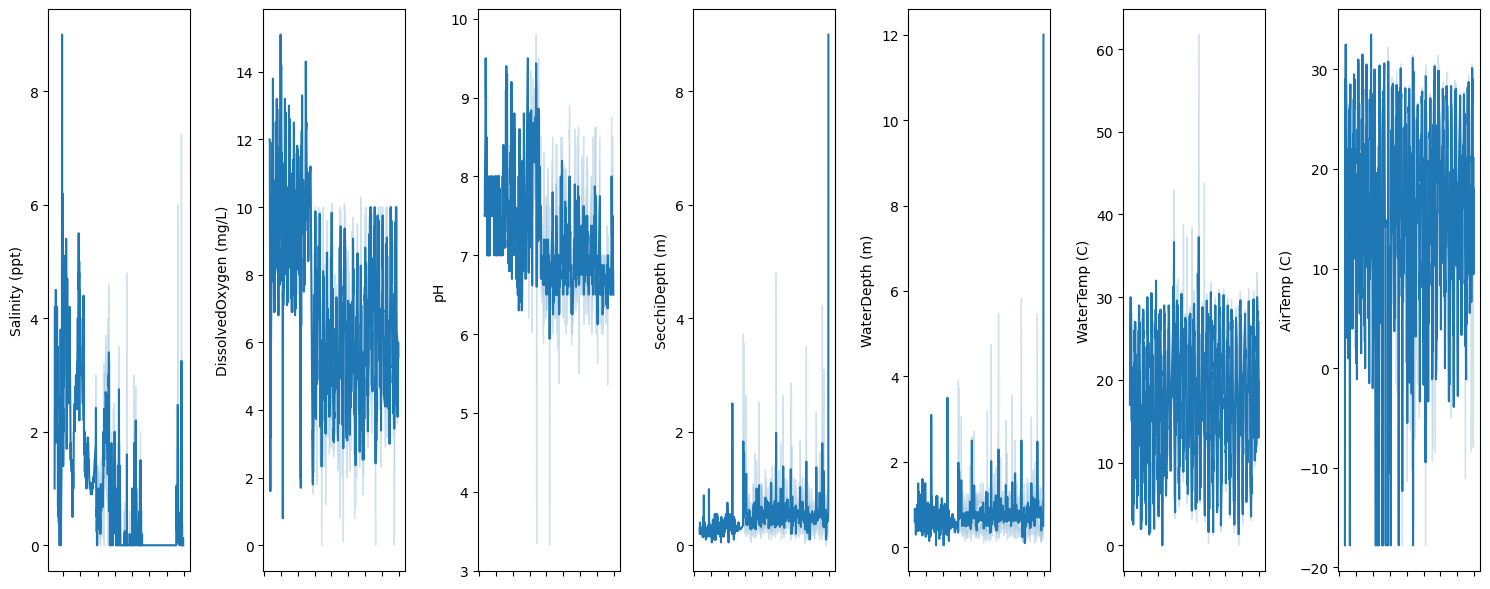

In [11]:
df = df_waterquality
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))

# Loop through the columns and plot
for i, col in enumerate(df.columns):
    #print(i,col)
    df1= df
    df1 = df.dropna(subset=[col])
    sns.lineplot(data=df1[col], ax=axes[i])
    axes[i].set_xticklabels(())
    axes[i].set_xlabel("")
    
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salinity (ppt)', ylabel='Count'>

[Text(-5.0, 0, ''), Text(0.0, 0, ''), Text(5.0, 0, ''), Text(10.0, 0, '')]

Text(0.5, 0, 'Salinity (ppt)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DissolvedOxygen (mg/L)', ylabel='Count'>

[Text(-10.0, 0, ''), Text(0.0, 0, ''), Text(10.0, 0, ''), Text(20.0, 0, '')]

Text(0.5, 0, 'DissolvedOxygen (mg/L)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pH', ylabel='Count'>

[Text(-5.0, 0, ''),
 Text(0.0, 0, ''),
 Text(5.0, 0, ''),
 Text(10.0, 0, ''),
 Text(15.0, 0, '')]

Text(0.5, 0, 'pH')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SecchiDepth (m)', ylabel='Count'>

[Text(-5.0, 0, ''), Text(0.0, 0, ''), Text(5.0, 0, ''), Text(10.0, 0, '')]

Text(0.5, 0, 'SecchiDepth (m)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WaterDepth (m)', ylabel='Count'>

[Text(-5.0, 0, ''),
 Text(0.0, 0, ''),
 Text(5.0, 0, ''),
 Text(10.0, 0, ''),
 Text(15.0, 0, '')]

Text(0.5, 0, 'WaterDepth (m)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WaterTemp (C)', ylabel='Count'>

[Text(-50.0, 0, ''), Text(0.0, 0, ''), Text(50.0, 0, ''), Text(100.0, 0, '')]

Text(0.5, 0, 'WaterTemp (C)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AirTemp (C)', ylabel='Count'>

[Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, '')]

Text(0.5, 0, 'AirTemp (C)')

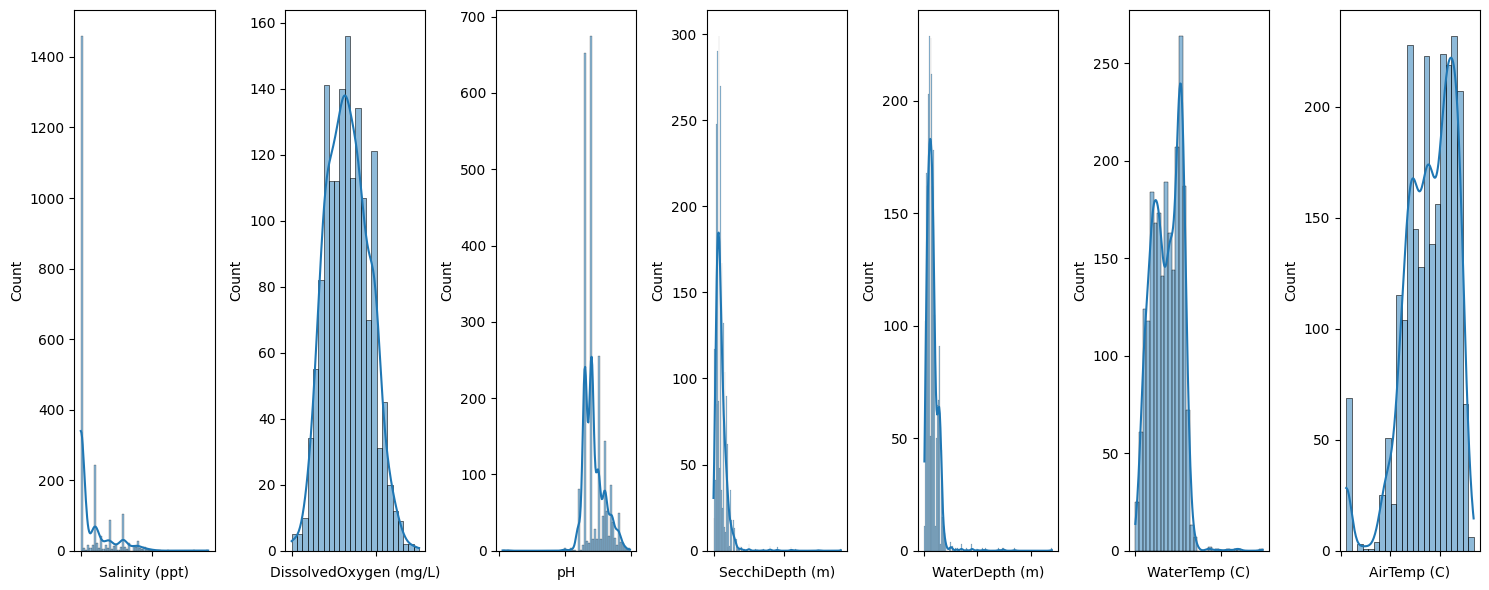

In [12]:
# Plot the distribution 
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))

# Loop through the columns and plot
for i, col in enumerate(df.columns):
    #print(i,col)
    df1= df
    df1 = df.dropna(subset=[col])
    sns.histplot(data=df1[col], ax=axes[i], kde=True)
    axes[i].set_xticklabels(())
    axes[i].set_xlabel(col)
    
plt.tight_layout()
plt.show()

With MEAN imputation

In [13]:
df = df_waterquality
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())
df.head(10)

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
Date,,,,,,,
1989-05-11,0.717903,6.648071,7.5,0.3,0.9,17.0,-17.777778
1989-05-18,0.717903,12.000000,7.5,0.2,0.6,17.5,20.500000
1989-05-25,0.717903,6.648071,8.0,0.4,0.8,23.0,25.000000
1989-06-01,0.717903,12.000000,8.0,0.4,0.9,25.5,29.000000
1989-07-11,0.717903,6.648071,8.5,0.3,0.9,28.5,28.000000
1989-07-20,0.717903,1.600000,9.0,0.3,0.9,30.0,32.500000
1989-07-27,0.717903,6.200000,9.0,0.3,0.8,27.0,27.000000
1989-08-03,0.717903,5.800000,9.5,0.2,0.7,25.0,28.000000
1989-08-10,0.717903,3.200000,9.0,0.2,0.3,21.5,22.500000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Salinity (ppt)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='DissolvedOxygen (mg/L)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='pH'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='SecchiDepth (m)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='WaterDepth (m)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='WaterTemp (C)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='AirTemp (C)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

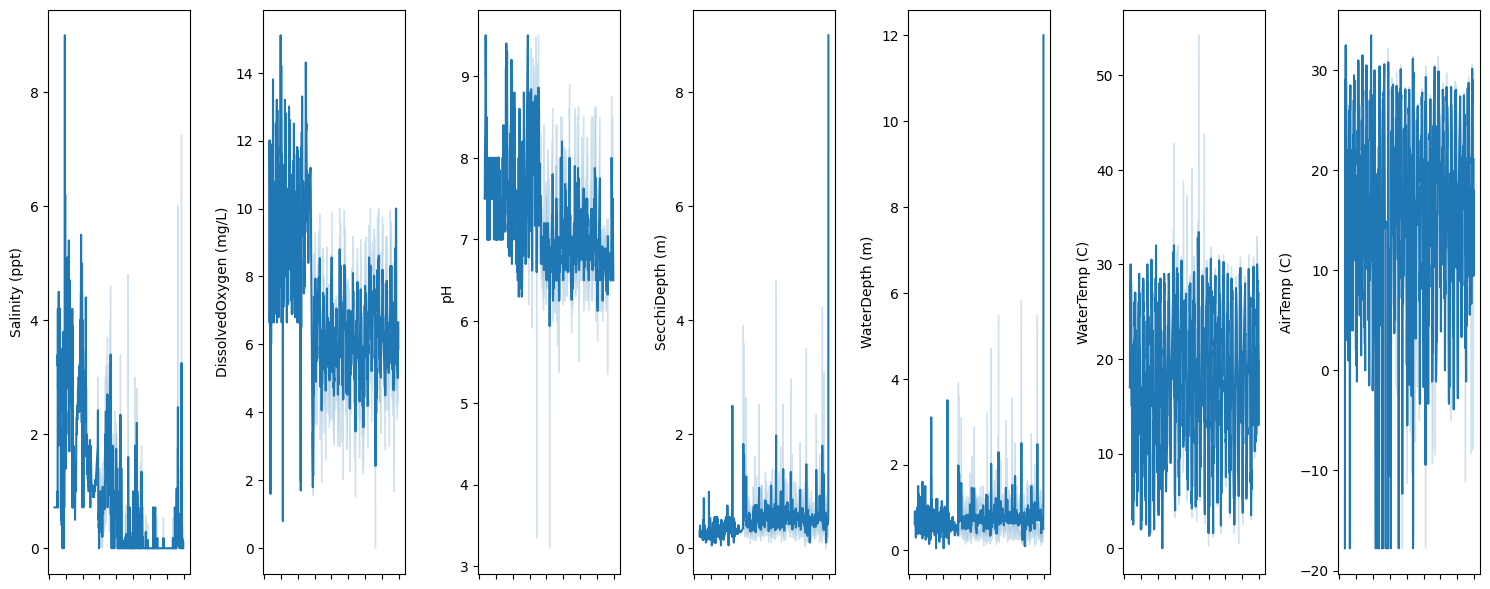

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))

# Loop through the columns and plot
for i, col in enumerate(df.columns):
    #print(i,col)
    sns.lineplot(data=df[col], ax=axes[i])
    axes[i].set_xticklabels(())
    axes[i].set_xlabel("")
    
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salinity (ppt)', ylabel='Count'>

[Text(-5.0, 0, ''), Text(0.0, 0, ''), Text(5.0, 0, ''), Text(10.0, 0, '')]

Text(0.5, 0, 'Salinity (ppt)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DissolvedOxygen (mg/L)', ylabel='Count'>

[Text(-10.0, 0, ''), Text(0.0, 0, ''), Text(10.0, 0, ''), Text(20.0, 0, '')]

Text(0.5, 0, 'DissolvedOxygen (mg/L)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pH', ylabel='Count'>

[Text(-5.0, 0, ''),
 Text(0.0, 0, ''),
 Text(5.0, 0, ''),
 Text(10.0, 0, ''),
 Text(15.0, 0, '')]

Text(0.5, 0, 'pH')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SecchiDepth (m)', ylabel='Count'>

[Text(-5.0, 0, ''), Text(0.0, 0, ''), Text(5.0, 0, ''), Text(10.0, 0, '')]

Text(0.5, 0, 'SecchiDepth (m)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WaterDepth (m)', ylabel='Count'>

[Text(-5.0, 0, ''),
 Text(0.0, 0, ''),
 Text(5.0, 0, ''),
 Text(10.0, 0, ''),
 Text(15.0, 0, '')]

Text(0.5, 0, 'WaterDepth (m)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WaterTemp (C)', ylabel='Count'>

[Text(-50.0, 0, ''), Text(0.0, 0, ''), Text(50.0, 0, ''), Text(100.0, 0, '')]

Text(0.5, 0, 'WaterTemp (C)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AirTemp (C)', ylabel='Count'>

[Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, '')]

Text(0.5, 0, 'AirTemp (C)')

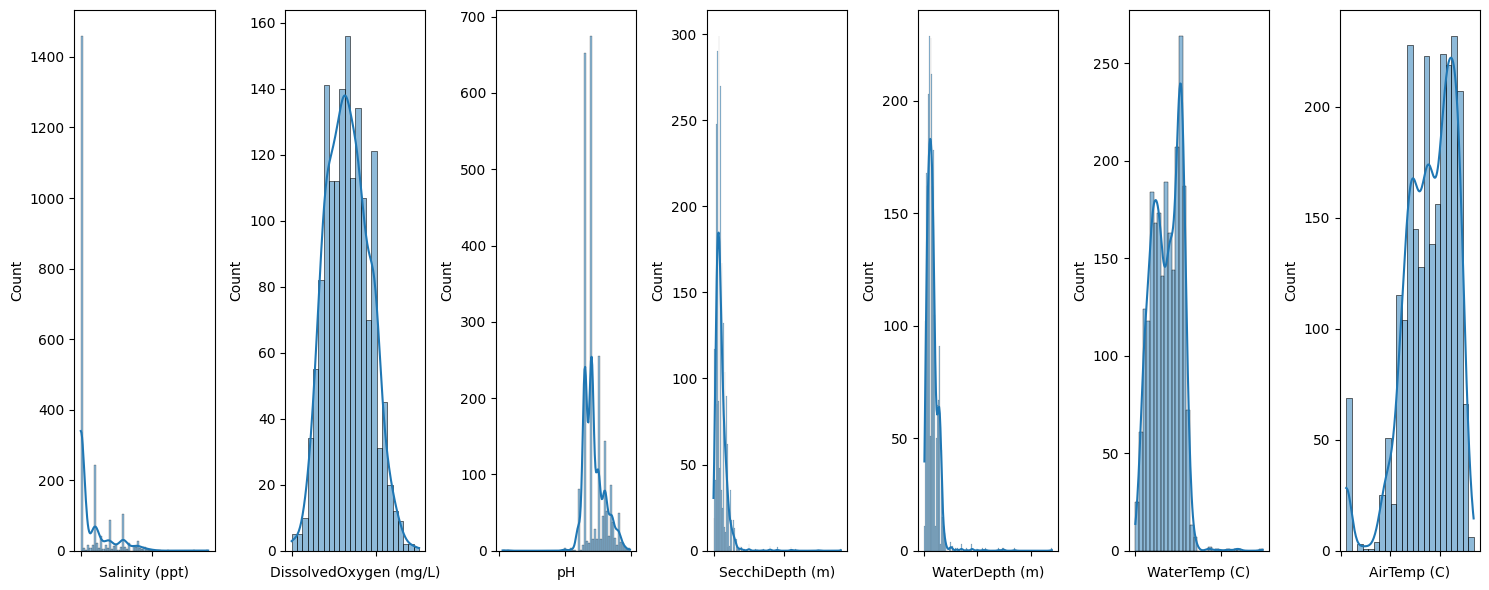

In [15]:
# Plot the distribution 
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))

# Loop through the columns and plot
for i, col in enumerate(df.columns):
    #print(i,col)
    sns.histplot(data=df1[col], ax=axes[i], kde=True)
    axes[i].set_xticklabels(())
    axes[i].set_xlabel(col)
    
plt.tight_layout()
plt.show()

With MEDIAN imputation

In [16]:
df = df_waterquality
for i in df.columns:
    df[i] = df[i].fillna(df[i].median())
df.head(10)

,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
Date,,,,,,,
1989-05-11,0.717903,6.648071,7.5,0.3,0.9,17.0,-17.777778
1989-05-18,0.717903,12.000000,7.5,0.2,0.6,17.5,20.500000
1989-05-25,0.717903,6.648071,8.0,0.4,0.8,23.0,25.000000
1989-06-01,0.717903,12.000000,8.0,0.4,0.9,25.5,29.000000
1989-07-11,0.717903,6.648071,8.5,0.3,0.9,28.5,28.000000
1989-07-20,0.717903,1.600000,9.0,0.3,0.9,30.0,32.500000
1989-07-27,0.717903,6.200000,9.0,0.3,0.8,27.0,27.000000
1989-08-03,0.717903,5.800000,9.5,0.2,0.7,25.0,28.000000
1989-08-10,0.717903,3.200000,9.0,0.2,0.3,21.5,22.500000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Salinity (ppt)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='DissolvedOxygen (mg/L)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='pH'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='SecchiDepth (m)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='WaterDepth (m)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='WaterTemp (C)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='AirTemp (C)'>

[Text(5113.0, 0, ''),
 Text(6574.0, 0, ''),
 Text(8035.0, 0, ''),
 Text(9496.0, 0, ''),
 Text(10957.0, 0, ''),
 Text(12418.0, 0, ''),
 Text(13879.0, 0, ''),
 Text(15340.0, 0, ''),
 Text(16801.0, 0, ''),
 Text(18262.0, 0, ''),
 Text(19723.0, 0, '')]

Text(0.5, 0, '')

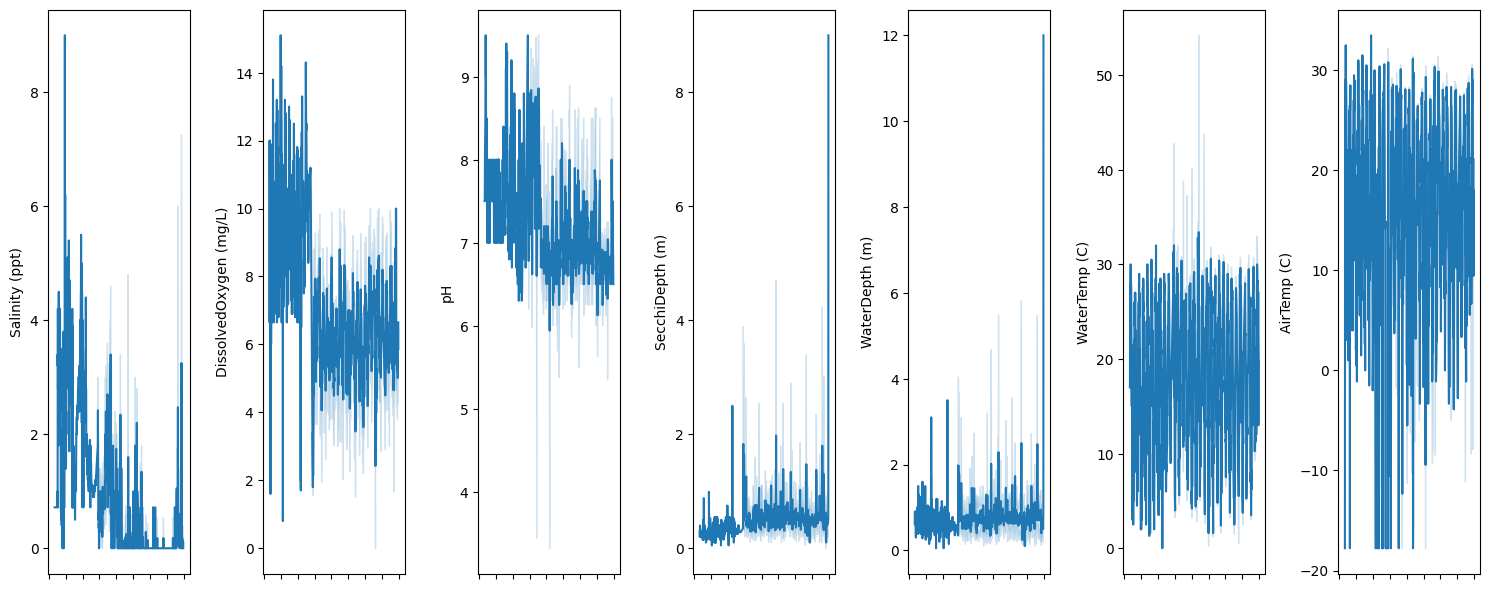

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))

# Loop through the columns and plot
for i, col in enumerate(df.columns):
    #print(i,col)
    sns.lineplot(data=df[col], ax=axes[i])
    axes[i].set_xticklabels(())
    axes[i].set_xlabel("")
    
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salinity (ppt)', ylabel='Count'>

[Text(-5.0, 0, ''), Text(0.0, 0, ''), Text(5.0, 0, ''), Text(10.0, 0, '')]

Text(0.5, 0, 'Salinity (ppt)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DissolvedOxygen (mg/L)', ylabel='Count'>

[Text(-10.0, 0, ''), Text(0.0, 0, ''), Text(10.0, 0, ''), Text(20.0, 0, '')]

Text(0.5, 0, 'DissolvedOxygen (mg/L)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pH', ylabel='Count'>

[Text(-5.0, 0, ''),
 Text(0.0, 0, ''),
 Text(5.0, 0, ''),
 Text(10.0, 0, ''),
 Text(15.0, 0, '')]

Text(0.5, 0, 'pH')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SecchiDepth (m)', ylabel='Count'>

[Text(-5.0, 0, ''), Text(0.0, 0, ''), Text(5.0, 0, ''), Text(10.0, 0, '')]

Text(0.5, 0, 'SecchiDepth (m)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WaterDepth (m)', ylabel='Count'>

[Text(-5.0, 0, ''),
 Text(0.0, 0, ''),
 Text(5.0, 0, ''),
 Text(10.0, 0, ''),
 Text(15.0, 0, '')]

Text(0.5, 0, 'WaterDepth (m)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='WaterTemp (C)', ylabel='Count'>

[Text(-50.0, 0, ''), Text(0.0, 0, ''), Text(50.0, 0, ''), Text(100.0, 0, '')]

Text(0.5, 0, 'WaterTemp (C)')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AirTemp (C)', ylabel='Count'>

[Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, '')]

Text(0.5, 0, 'AirTemp (C)')

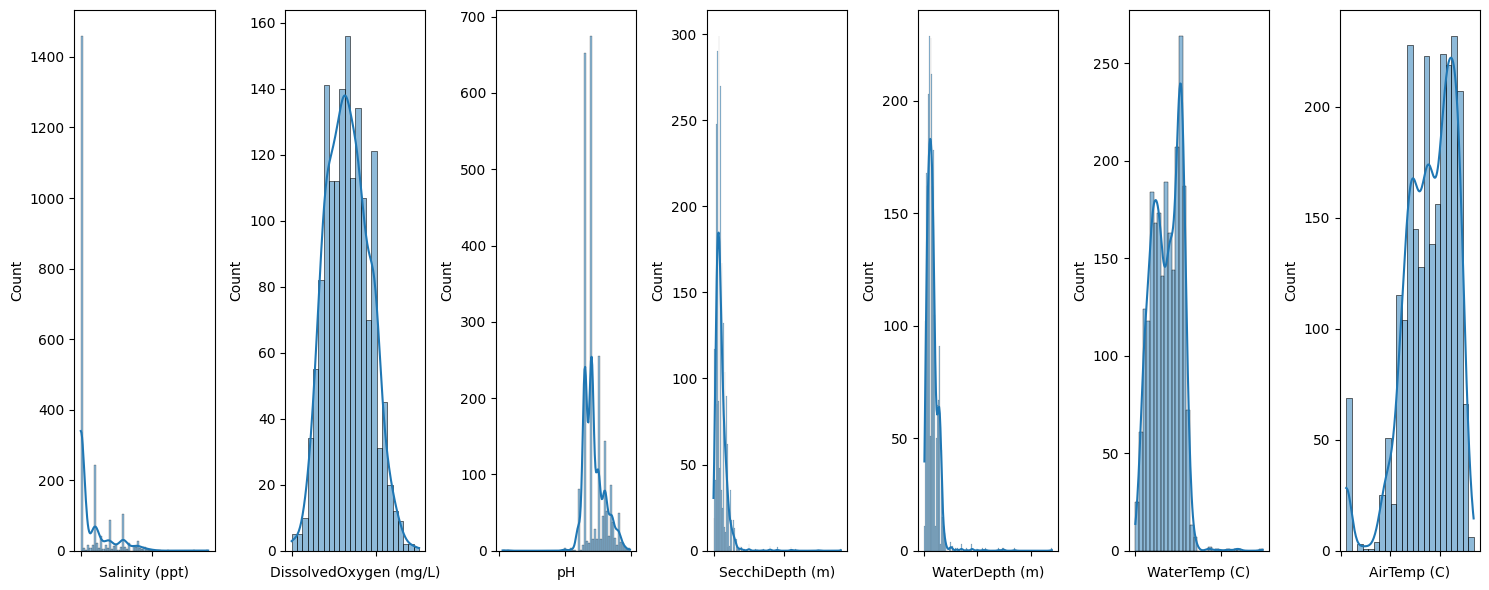

In [18]:
# Plot the distribution 
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))

# Loop through the columns and plot
for i, col in enumerate(df.columns):
    #print(i,col)
    sns.histplot(data=df1[col], ax=axes[i], kde=True)
    axes[i].set_xticklabels(())
    axes[i].set_xlabel(col)
    
plt.tight_layout()
plt.show()

Proceeding with MEDIAN imputation method.
We next visualize relationships between parameters (columns).

                        Salinity (ppt)  DissolvedOxygen (mg/L)        pH  \
Salinity (ppt)                1.000000                0.264953  0.283388   
DissolvedOxygen (mg/L)        0.264953                1.000000  0.045207   
pH                            0.283388                0.045207  1.000000   
SecchiDepth (m)              -0.148558               -0.045275 -0.146598   
WaterDepth (m)               -0.081388               -0.003337 -0.162026   
WaterTemp (C)                -0.008151               -0.403291  0.187907   
AirTemp (C)                   0.044265               -0.241926  0.149557   

                        SecchiDepth (m)  WaterDepth (m)  WaterTemp (C)  \
Salinity (ppt)                -0.148558       -0.081388      -0.008151   
DissolvedOxygen (mg/L)        -0.045275       -0.003337      -0.403291   
pH                            -0.146598       -0.162026       0.187907   
SecchiDepth (m)                1.000000        0.815946      -0.030213   
WaterDepth (m)       

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Water Quality Parameters')

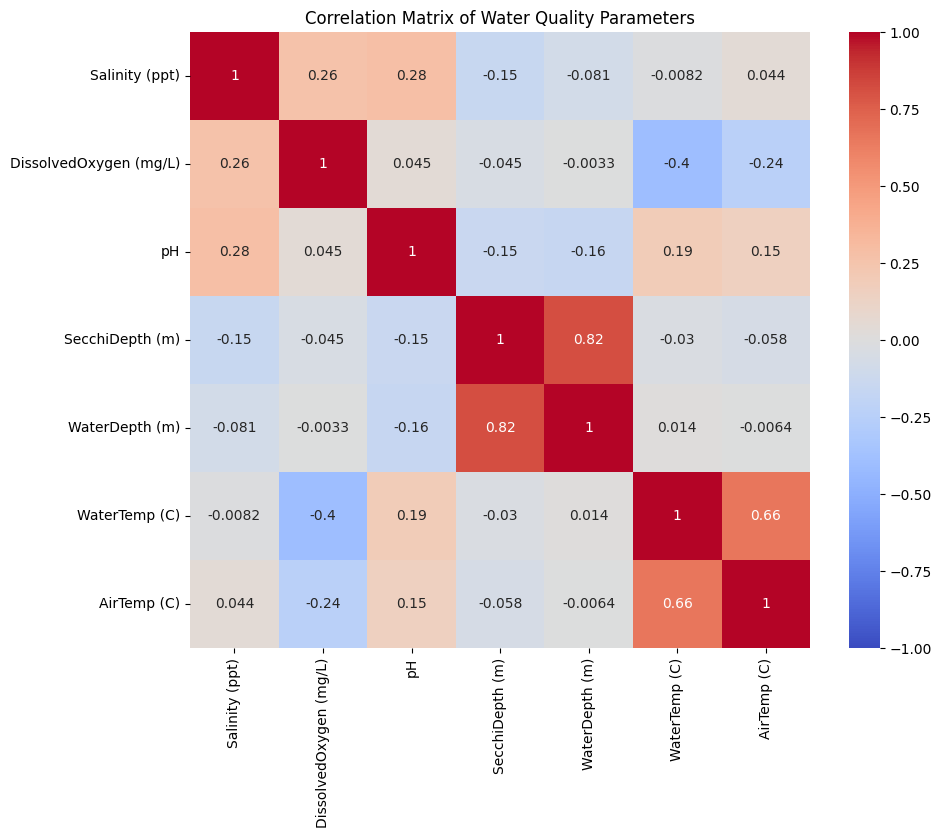

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

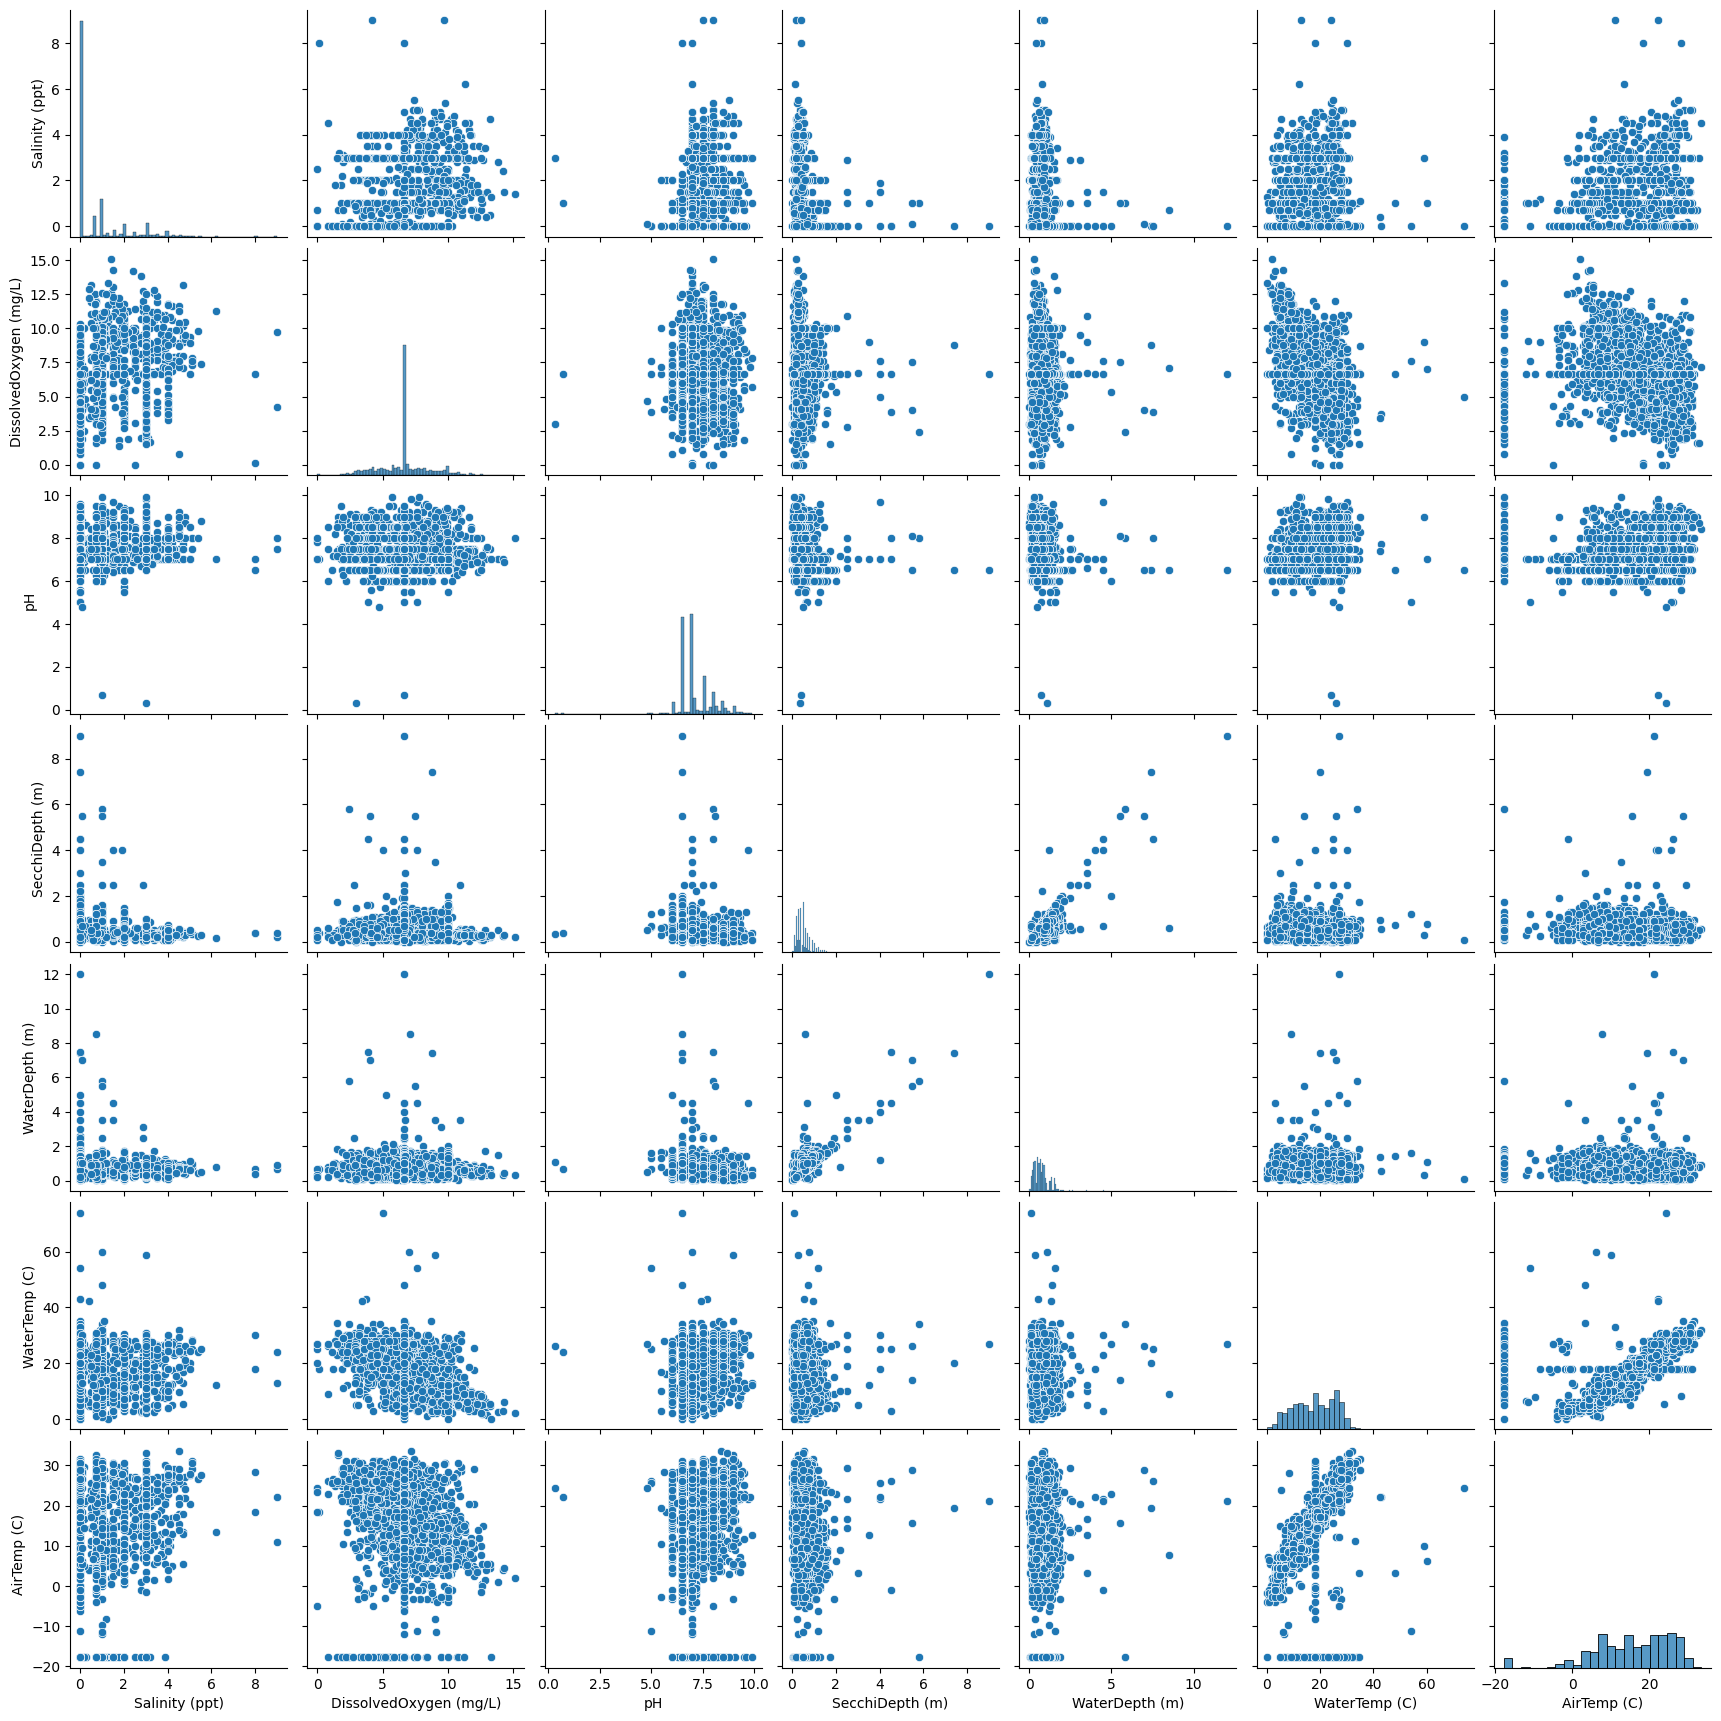

In [19]:
# Calculate correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Water Quality Parameters')
plt.show()

# Pair plot
sns.pairplot(df)
plt.show()

# Scatter plot example for specific pair of variables
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=df, x='salinity', y='pH')
#plt.title('Scatter Plot of Salinity vs. pH')
#plt.xlabel('Salinity (ppt)')
#plt.ylabel('pH')
#plt.show()